### Making the Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()
import plotly.graph_objects as go
import plotly.express as px

> Train a KMean model on the large dataset then use this to get distinct clusters.

### Create the DataFrames

In [2]:
df = pd.read_csv("dataset.csv")
df.shape

(42305, 13)

In [3]:
dfm = pd.read_csv("all_songs.csv")
dfm.shape

(474, 13)

In [16]:
# dfm.head()

### Training the KMeans Model

In [4]:
names = df['song_name']
all_songs_num = df.drop(['song_name', 'uri'], axis=1)
names_my = dfm['name']
all_songs_num_my = dfm.drop(['name', 'uri'], axis=1)

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (-1,1))
all_songs_num_scaled = scaler.fit_transform(all_songs_num)

In [6]:
all_songs_num_scaled = pd.DataFrame(all_songs_num_scaled, columns=all_songs_num.columns)

In [7]:
from sklearn.cluster import KMeans
inertia = []
for i in range(2, 11):
    print(i)
    km = KMeans(n_clusters=i)
    km.fit(all_songs_num_scaled)
    inertia.append(km.inertia_)

2
3
4
5
6
7
8
9
10


In [8]:
px.line(x=range(2, 11), y=inertia)

Let's choose n_clusters = 5.

In [9]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(all_songs_num_scaled)

KMeans(n_clusters=5)

#### Now, my songs

In [10]:
all_songs_num_my_scaled = MinMaxScaler(feature_range=(-1,1)).fit_transform(all_songs_num_my)

In [21]:
my_labels = kmeans.predict(all_songs_num_my_scaled)

Let's see what song is allote to which cluster.

In [24]:
# pd.Series(my_labels)

In [32]:
my_labels_df = pd.DataFrame([names_my, my_labels]).T
my_labels_df.columns = ['name', 'cluster']

In [34]:
my_labels_df[my_labels_df['cluster'] == 0]

name cluster
37                                      Chromatica III       0
39                                       Chromatica II       0
258  Main Titles - The Little Mermaid - From "The L...       0
276                                 Two Worlds Reprise       0
280                                       Introduction       0
378                                    Aaja Re Pardesi       0
445                               Chahoonga Main Tujhe       0

In [35]:
my_labels_df[my_labels_df['cluster'] == 1]

name cluster
40                       Chromatica I       1
154               everything i wanted       1
344     Aaj Phir Jeene Ki Tamanna Hai       1
398                 Ek Radha Ek Meera       1
403         Kahin Deep Jale Kahin Dil       1
408                  Rim Jhim Ke Geet       1
420  Pardesiyon Se Na Ankhiyan Milana       1

In [37]:
names_my[my_labels == 0]

37                                        Chromatica III
39                                         Chromatica II
258    Main Titles - The Little Mermaid - From "The L...
276                                   Two Worlds Reprise
280                                         Introduction
378                                      Aaja Re Pardesi
445                                 Chahoonga Main Tujhe
Name: name, dtype: object

In [36]:
my_labels_df[my_labels_df['cluster'] == 2]

name cluster
0    Run (feat. Ed Sheeran) (Taylor’s Version) (Fro...       2
10                                      My Little Love       2
17   The Last Time (feat. Gary Lightbody of Snow Pa...       2
18                   Stay Stay Stay (Taylor's Version)       2
19                      Treacherous (Taylor's Version)       2
..                                                 ...     ...
459                      Main Pal Do Pal Ka Shair Hoon       2
465              Ek Din Bik Jayega Mati Ke Mol - Happy       2
466                             Yeh Mera Diwanapan Hai       2
468                     Woh Chand Khila Woh Tare Hanse       2
472                                         Love Story       2

[150 rows x 2 columns]

In order to see the clusters, we have to use PCA on my song data.

In [68]:
from sklearn.decomposition import PCA
pca = PCA(4)
features_pca = pca.fit_transform(all_songs_num_my_scaled)

In [69]:
pca.explained_variance_ratio_.sum()

0.7913669622140034

Not very good representive. Still!

In [70]:
features_pcatures_pca = pd.DataFrame(features_pca, columns=['pca1', 'pca2', 'pca3', 'pca4'])

In [71]:
features_pcatures_pca['label'] = my_labels

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
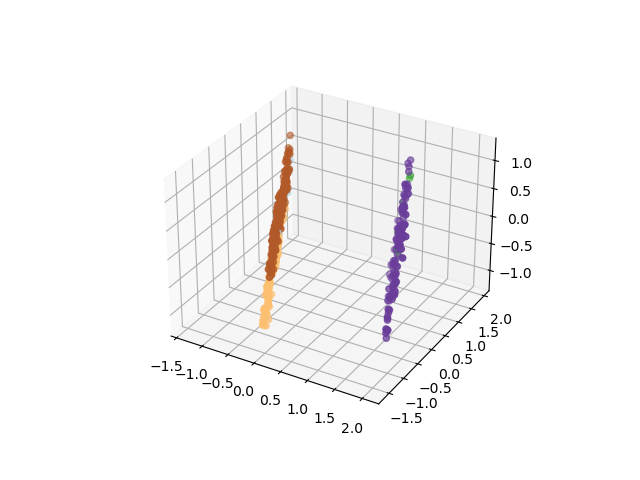

In [72]:
%matplotlib widget
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(features_pcatures_pca['pca1'], features_pcatures_pca['pca2'], features_pcatures_pca['pca3'],
    c=features_pcatures_pca['label'], cmap='Paired')

In [73]:
fig = px.scatter_3d(x=features_pcatures_pca['pca1'], y=features_pcatures_pca['pca2'], z=features_pcatures_pca['pca3'],
    color=features_pcatures_pca['label'])
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

In [67]:
names_my[features_pcatures_pca['pca1']>0.2].tail(20)

407                   Lo Aa Gayi Unki Yaad
408                       Rim Jhim Ke Geet
412                  Mera Naam Hai Chameli
420       Pardesiyon Se Na Ankhiyan Milana
424                     Ruke Ruke Se Qadam
428                              Tera Jana
429             Tere Bin Soone Nain Humare
431           Tere Mere Milan Ki Yeh Raina
432                 Tere Sur Aur Mere Geet
440                    Likhe Jo Khat Tujhe
441         Chura Liya Hai Tumne Jo Dil Ko
449                      Ye Jo Chilman Hai
452           Ek Tha Gul Aur Ek Thi Bulbul
457                Sab Kuchh Seekha Ham Ne
458                Sajan Re Jhoot Mat Bolo
460                Kisi Ki Muskurahaton Se
461            Suhana Safar Aur Yeh Mausam
467    Jo Tumko Hopasand Wohi Baat Karenge
469                Jane Kahan Gaye Woh Din
470            Aa Ja Re Ab Mera Dil Pukare
Name: name, dtype: object

In [66]:
names_my[features_pcatures_pca['pca1']<=0.2].tail(20)

445                          Chahoonga Main Tujhe
446                         Yeh Duniya Yeh Mehfil
447                  Tum Mujhe Yun Bhula Na Paoge
448                  Aaja Tujhko Pukare Mera Pyar
450                            Caravan Guzar Gaya
451                            Ae Phoolon Ki Rani
453               O Haseena Zulfonwale Jane Jahan
454                       Mere Mitwa Mere Meet Re
455    Chandan Sa Badan Chanchal Chitwan - Mukesh
456                               Maine Tere Liye
459                 Main Pal Do Pal Ka Shair Hoon
462                            Kya Khoob Lagti Ho
463                     Chand Si Mehbooba Ho Meri
464                  Kahin Door Jab Din Dhal Jaye
465         Ek Din Bik Jayega Mati Ke Mol - Happy
466                        Yeh Mera Diwanapan Hai
468                Woh Chand Khila Woh Tare Hanse
471                                      Fearless
472                                    Love Story
473                            You Belong With Me


Now, to visualize, we'll do Prinipal Component Analysis.

In [80]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
all_data =  pca.fit_transform(all_songs_num_scaled)

In [67]:
kmeans.predict(all_songs_num_scaled).shape

(42305,)

In [72]:
features_pcatures_pca_all = pd.DataFrame(all_data, columns=['pca1', 'pca2'])
features_pcatures_pca_all['label'] = kmeans.predict(all_songs_num_scaled)


In [73]:
sns.scatterplot(data = features_pcatures_pca_all, x='pca1', y='pca2', hue = 'label', alpha=0.5, palette='viridis')

<AxesSubplot:xlabel='pca1', ylabel='pca2'>

In [78]:
px.scatter(x = features_pcatures_pca_all['pca1'], y = features_pcatures_pca_all['pca2'], color = features_pcatures_pca_all['label'])

In [2]:
px.scatter(x = features_pcatures_pca['pca1'], y = features_pcatures_pca['pca2'], color = features_pcatures_pca['label'])

NameError: name 'px' is not defined

In [1]:
features_pcatures_pca[features_pcatures_pca['pca1']>0.5]

NameError: name 'features_pcatures_pca' is not defined